In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('../DATA/AAPLStocks.xlsx',parse_dates=True)
data.drop('Unnamed: 0', axis=1, inplace=True)
data['date']= pd.to_datetime(data[['Year', 'month','day']])
data.set_index('date', inplace=True)
data.drop(['Year', 'month','day'], axis=1,inplace=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


In [3]:
df=data[data['Close']>78]

In [4]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
2020-01-17,77.460642,78.065593,77.149597,78.063148,137816400,0.0,0
2020-01-23,77.864757,78.266420,77.308785,78.185600,104472000,0.0,0
2020-01-29,79.464086,80.296811,78.712182,79.437141,216229200,0.0,0
2020-01-30,78.506459,79.375919,78.068051,79.322037,126743200,0.0,0
2020-02-04,77.225528,78.286033,76.814065,78.092545,136616400,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


In [5]:
df=df[['Close']].copy()

In [6]:
df

,Close
date,
2020-01-17,78.063148
2020-01-23,78.185600
2020-01-29,79.437141
2020-01-30,79.322037
2020-02-04,78.092545
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


<AxesSubplot:xlabel='date'>

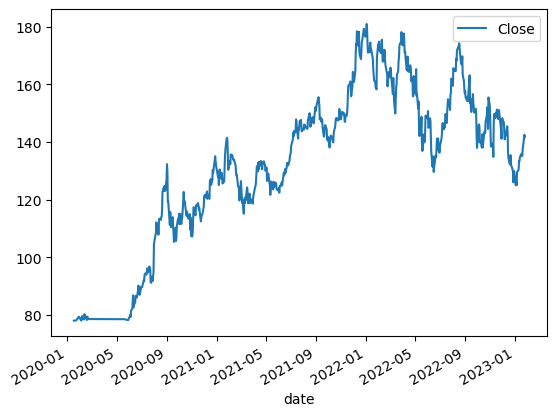

In [7]:
df.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
result= adfuller(df['Close'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -2.508188419541179
p-value: 0.11349468487812037


In [11]:

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

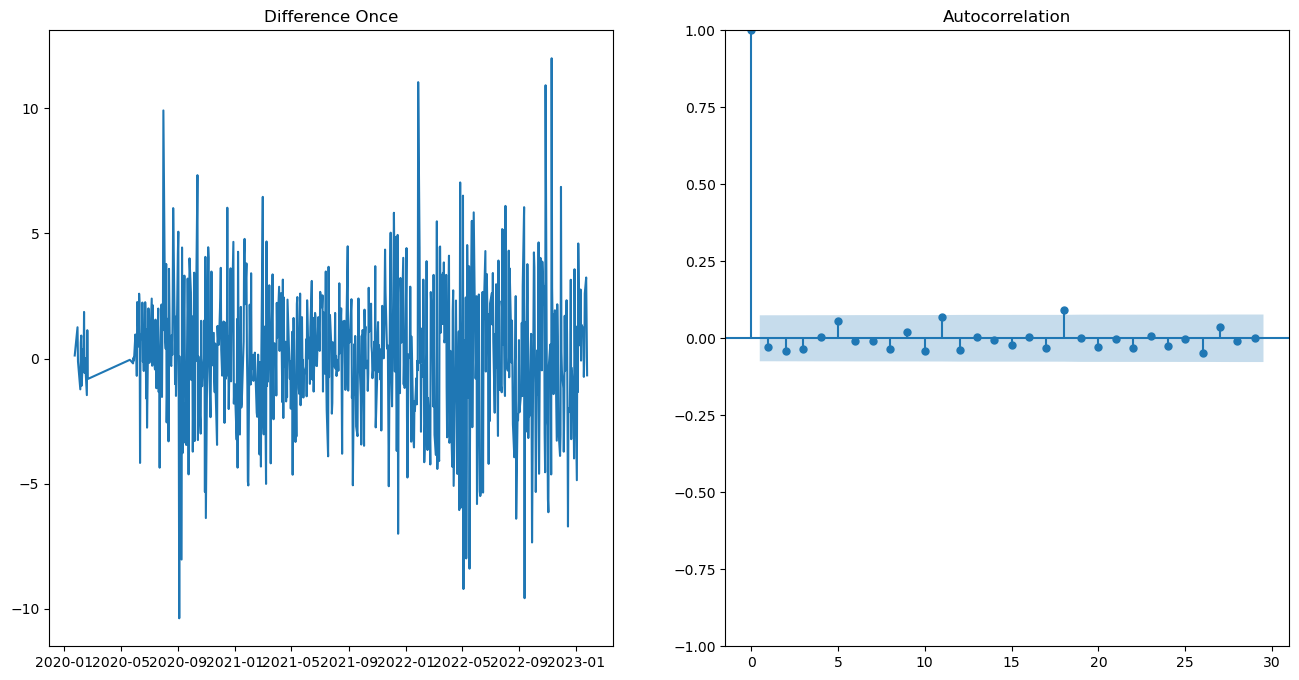

In [12]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,8))
ax1.plot(diff)
ax1.set_title('Difference Once')
plot_acf(diff,ax=ax2);

In [13]:
from pmdarima.arima.utils import ndiffs

In [14]:
ndiffs(df.Close,test='adf')

1

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

C:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


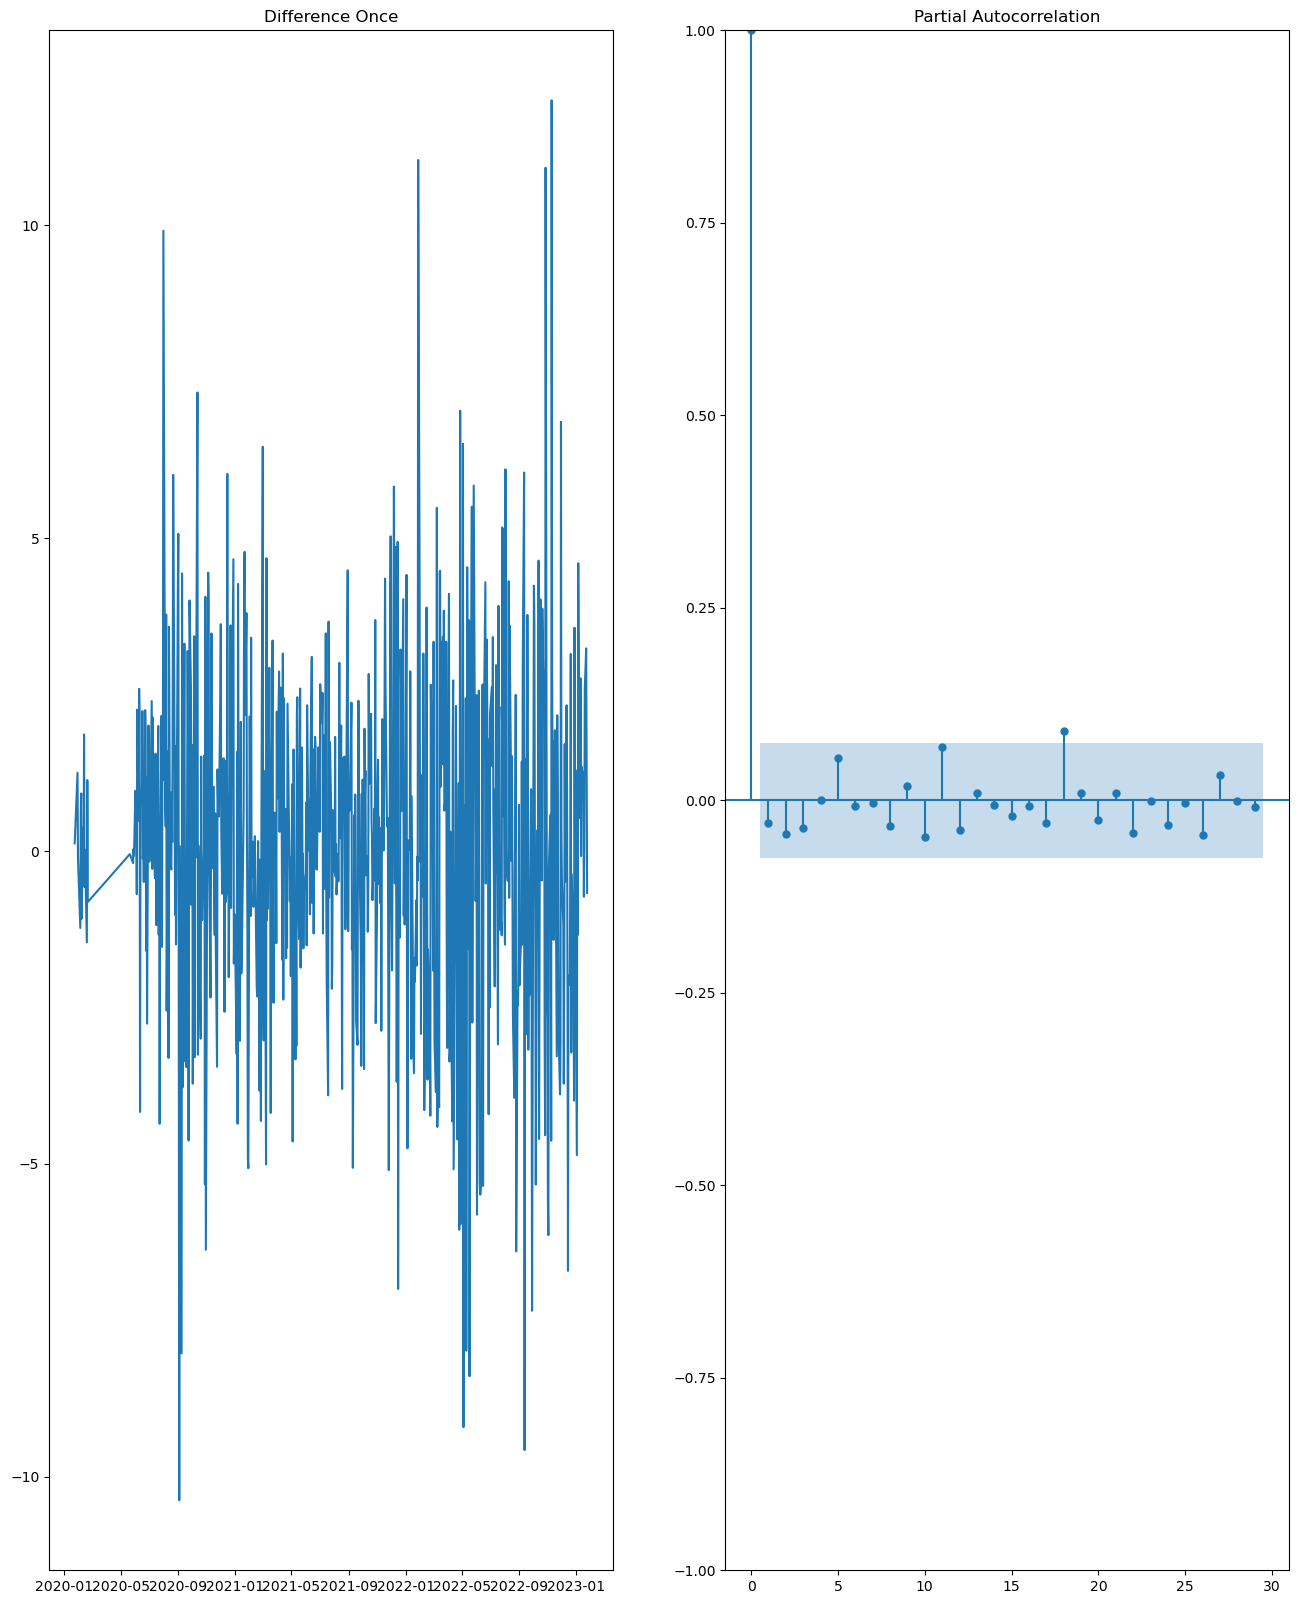

In [16]:
diff=df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,20))
ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

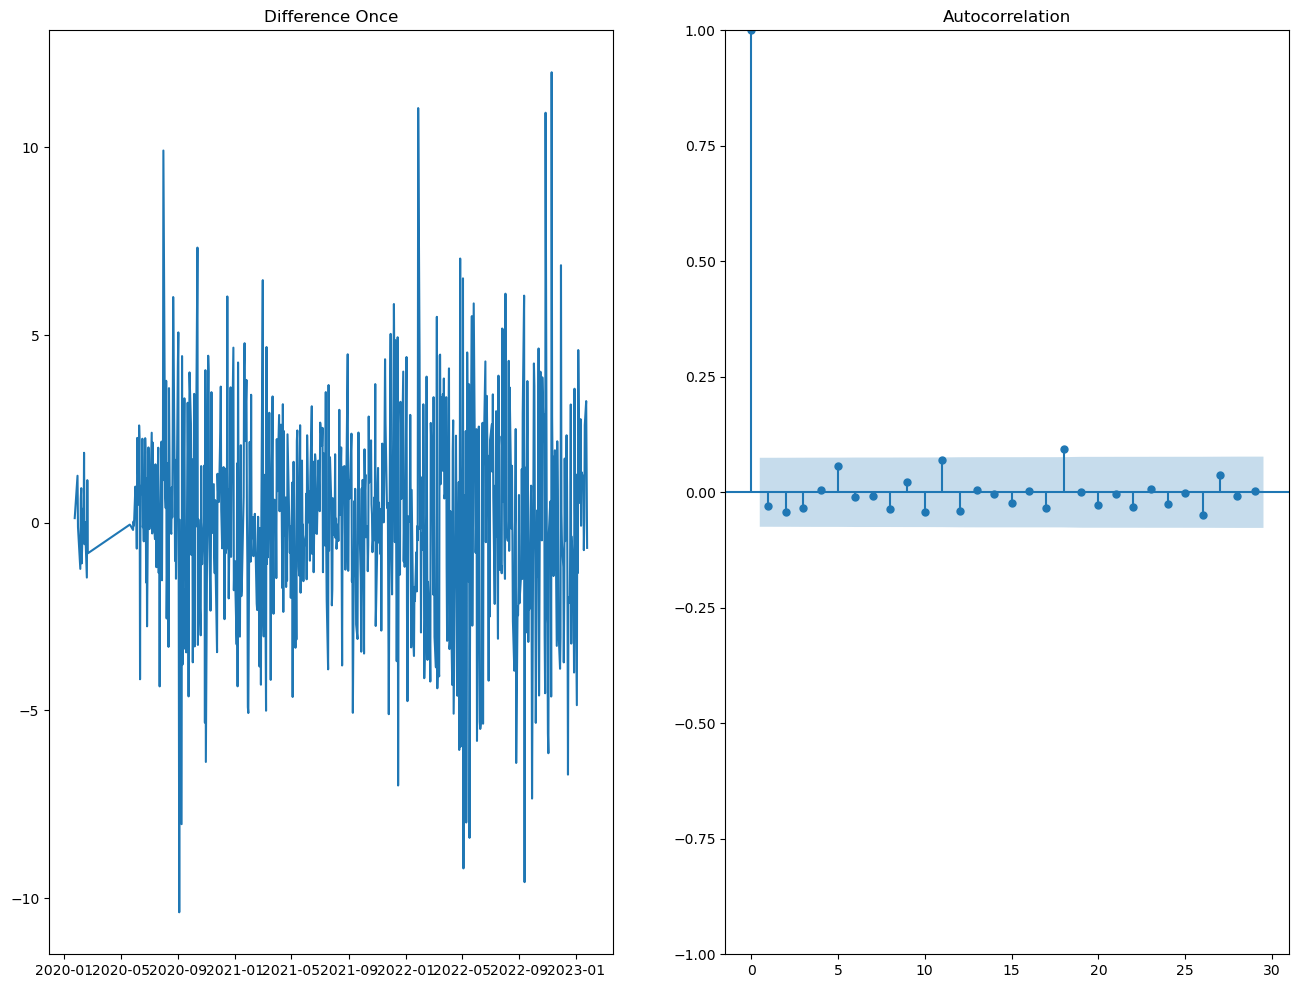

In [17]:
diff= df.Close.diff().dropna()
fig,(ax1,ax2)= plt.subplots(1,2, figsize=(16,12))
ax1.plot(diff)
ax1.set_title('Difference Once')
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

In [22]:
split_index = int(len(df) * 0.8)
train_data = df[:split_index]
test_data = df[split_index:]

In [24]:

model = pm.auto_arima(train_data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2643.471, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2645.177, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2645.159, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2642.680, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.830 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  552
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1320.340
Date:                Tue, 14 Feb 2023   AIC                           2642.680
Time:                        17:17:19   BIC                           2646.992
Sample:                             0   HQIC                          2644.365
                                - 552                                         
Co

In [25]:
model= ARIMA(df.Close,order=(0,1,0))
result= model.fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  690
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1681.863
Date:                Tue, 14 Feb 2023   AIC                           3365.726
Time:                        17:17:25   BIC                           3370.261
Sample:                             0   HQIC                          3367.480
                                - 690                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.7227      0.314     24.582      0.000       7.107       8.338
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                65.75
Prob(Q):                              0.44   Pr

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

RMSE:  13.100502525855168


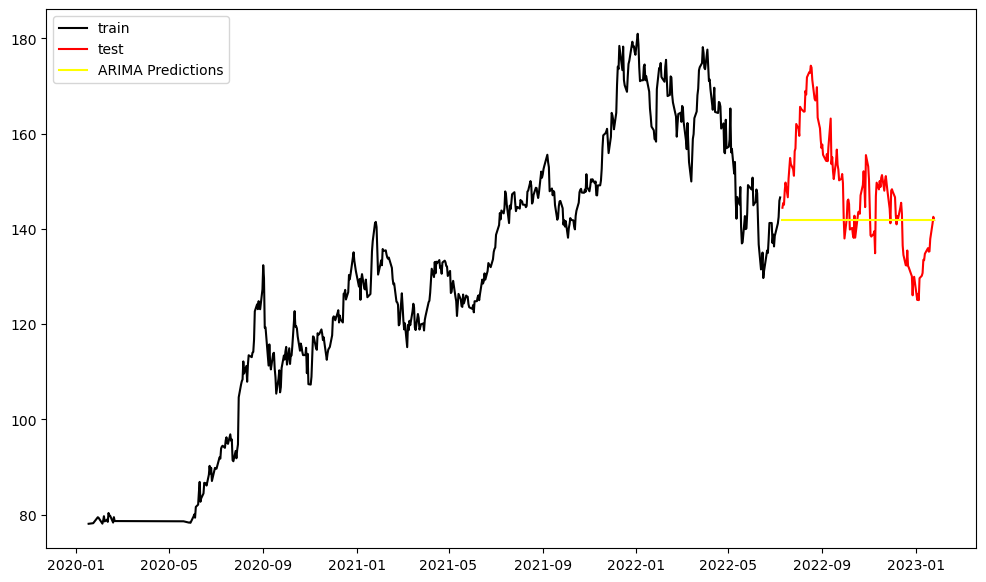

In [27]:
ARIMAmodel = ARIMA(df.Close, order = (0, 1, 0))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_data.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_data.index
y_pred_out = y_pred_df["Predictions"] 
plt.figure(figsize=(12,7))
plt.plot(train_data, color = "black", label = 'train')
plt.plot(test_data, color = "red", label = 'test')
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test_data["Close"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


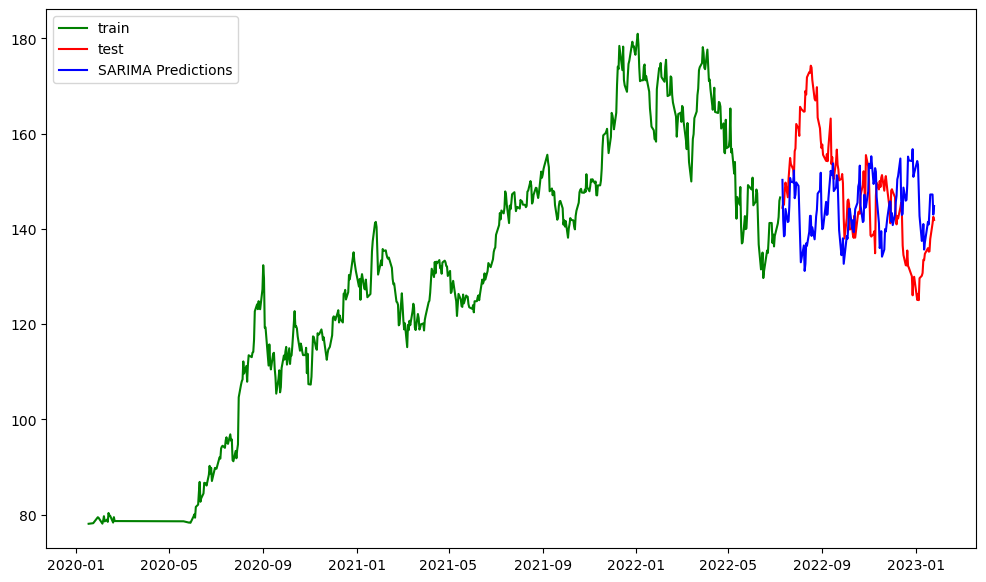

In [29]:
SARIMAXmodel = SARIMAX(train_data, order = (0, 1, 0), seasonal_order=(0,1,0,36))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test_data.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_data.index
y_pred_out = y_pred_df["Predictions"]
plt.figure(figsize=(12,7))
plt.plot(train_data, color = "green", label = 'train')
plt.plot(test_data, color = "red", label = 'test')
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [30]:

arma_rmse = np.sqrt(mean_squared_error(test_data["Close"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  14.94799055412635


In [34]:
 from sklearn.metrics import mean_squared_error as mse

In [35]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(y_train,lags=0).fit()
y_ar = ar_model.predict(490,689)
y_ar = y_ar.reset_index(drop=True)
y_ar.index = y_test.index
mse(y_ar,y_test)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


405.82351817115995

In [36]:
y_train = df.iloc[:490]
y_test = df.iloc[490:]

In [37]:
y_test

,Close
date,
2022-04-08,169.323990
2022-04-11,165.003525
2022-04-12,166.904938
2022-04-13,169.632584
2022-04-14,164.545593
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


In [38]:
def plot_pred(pred,title):
    plt.figure(figsize=(17,5))
    plt.plot(y_train,label='Train')
    plt.plot(y_test,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

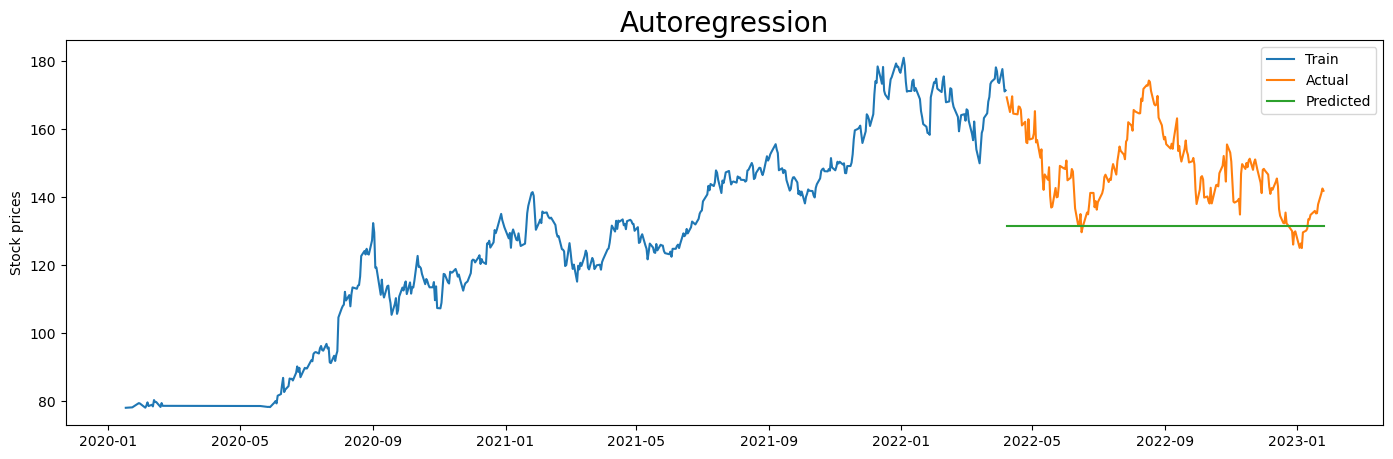

In [39]:
plot_pred(y_ar,"Autoregression")

In [40]:
from statsmodels.tsa.arima.model import ARIMA
ma = ARIMA(y_train, order=(0,0, 1)).fit()
y_mam = ma.predict(490,689)
y_mam.index = y_test.index
mse(y_mam,y_test)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Us

400.81195902617384

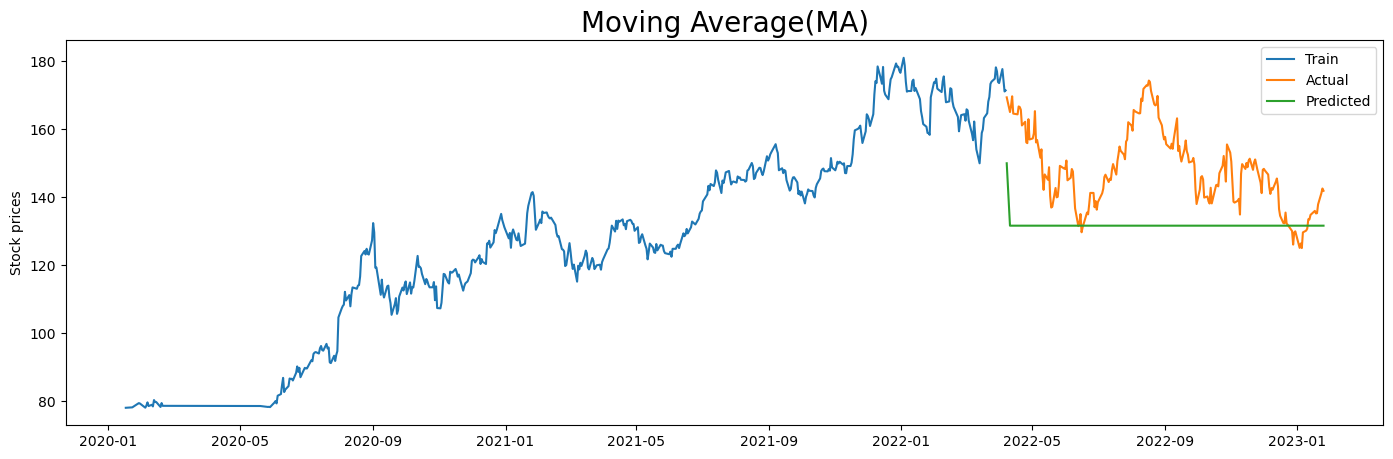

In [41]:
plot_pred(y_mam,"Moving Average(MA)")

In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(y_train, order=(0, 1, 0), seasonal_order=(0, 1, 0, 36),mle_regression=True)\
.fit(disp=False)
y_sarima = sarima.predict(490,689,typ='levels')
y_sarima.index = y_test.index
mse(y_sarima,y_test)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


412.9322964831954

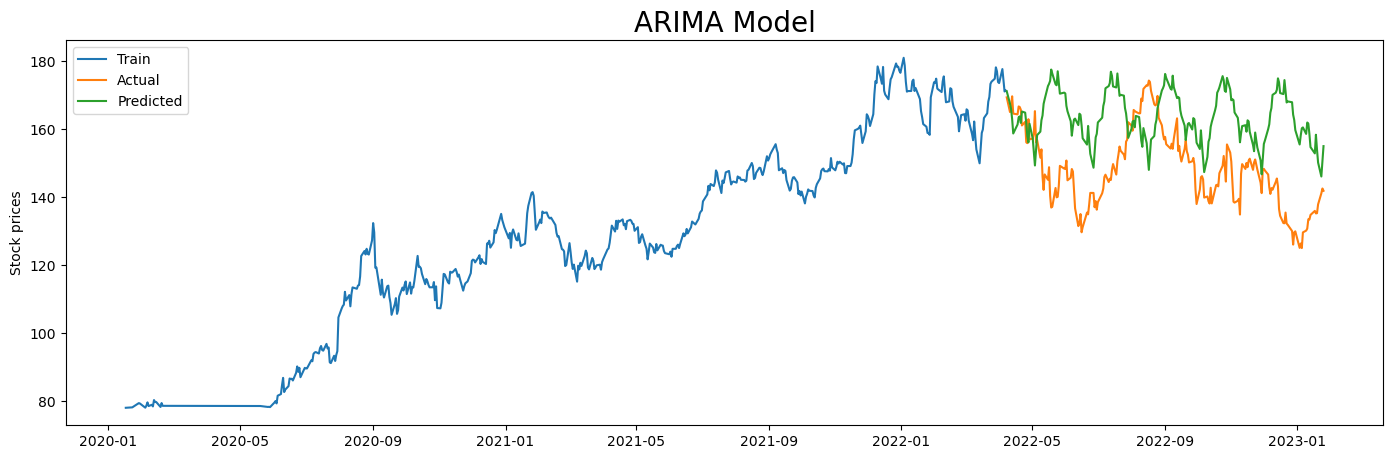

In [54]:
plot_pred(y_sarima,"ARIMA Model")


In [1]:
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)[:3]  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: name 'ARIMA' is not defined